# **RBC Classification using CNN**

**Importing the required libraries and modules**

In [1]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

In [2]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

**Setting the required directories etc**

In [3]:
img_width = 150
img_height = 150

train_data_dir = '../input/hypochromic-cells/hypo/train'
validation_data_dir = '../input/hypochromic-cells/hypo/val'
train_samples = 310
validation_samples = 75
epochs = 80
batch_size = 10

#Check for TensorFlow or Thieno
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

**Creating the model**

In [4]:
from keras.layers import BatchNormalization

In [5]:
model = Sequential()
# Conv2D : Two dimenstional convulational model.
# 32 : Input for next layer
# (3,3) convulonational windows size
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
#model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        1

In [7]:
import keras
from keras import optimizers
model.compile(loss='binary_crossentropy', 
              optimizer=keras.optimizers.Adam(lr=.0005), 
              metrics=['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [9]:
# augmentation configuration used for testing:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 310 images belonging to 2 classes.


In [11]:
print(train_generator.class_indices)

{'hypochromic': 0, 'normal': 1}


In [12]:
imgs, labels = next(train_generator)

In [13]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

10
[1. 0.]


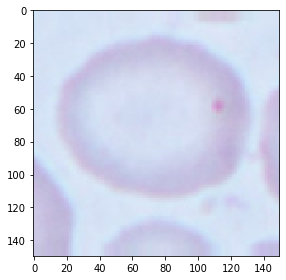

[1. 0.]


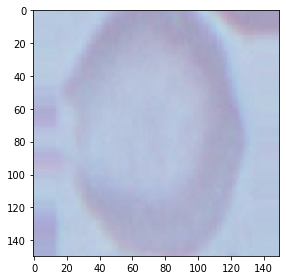

[0. 1.]


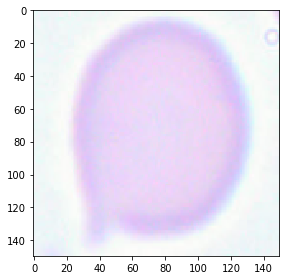

[1. 0.]


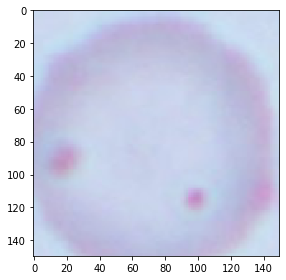

[0. 1.]


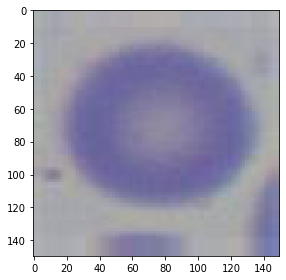

[1. 0.]


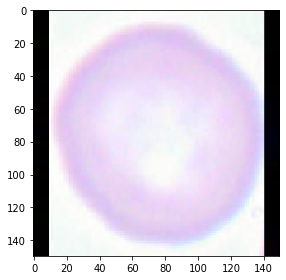

[0. 1.]


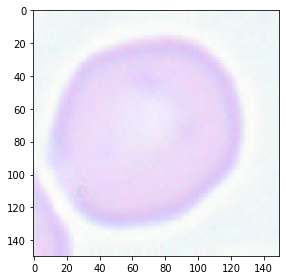

[0. 1.]


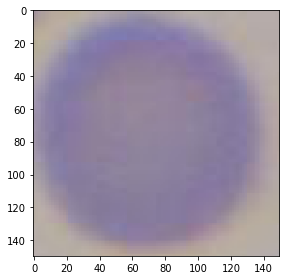

[0. 1.]


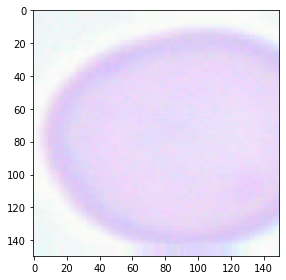

[1. 0.]


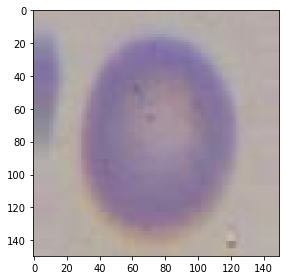

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()

print(len(image_batch))
for i in range(0,len(image_batch)):
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [15]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 75 images belonging to 2 classes.


**Training the model**

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_samples // batch_size)

Epoch 1/80
31/31 [==============================] - 7s 212ms/step - loss: 0.6626 - accuracy: 0.5925 - val_loss: 0.6893 - val_accuracy: 0.5000
Epoch 2/80
31/31 [==============================] - 5s 174ms/step - loss: 0.6522 - accuracy: 0.6839 - val_loss: 0.6634 - val_accuracy: 0.5000
Epoch 3/80
31/31 [==============================] - 5s 174ms/step - loss: 0.5987 - accuracy: 0.7092 - val_loss: 0.6543 - val_accuracy: 0.8429
Epoch 4/80
31/31 [==============================] - 6s 174ms/step - loss: 0.6201 - accuracy: 0.7308 - val_loss: 0.6047 - val_accuracy: 0.5857
Epoch 5/80
31/31 [==============================] - 5s 172ms/step - loss: 0.5139 - accuracy: 0.8148 - val_loss: 0.6104 - val_accuracy: 0.5571
Epoch 6/80
31/31 [==============================] - 5s 173ms/step - loss: 0.4702 - accuracy: 0.8283 - val_loss: 0.4453 - val_accuracy: 0.8571
Epoch 7/80
31/31 [==============================] - 5s 175ms/step - loss: 0.3958 - accuracy: 0.8834 - val_loss: 0.2931 - val_accuracy: 0.8571
Epoch 

In [17]:
y = model.save_weights('RBC_two.h5') 

In [18]:
x = history.history['accuracy']
best_accuracy = max(x)
best_accuracy

0.977419376373291

**Final accuracy obtained**

In [19]:
z = history.history['accuracy'][-1]

In [20]:
print('accuracy obtained =',z*100)

accuracy obtained = 97.41935729980469


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


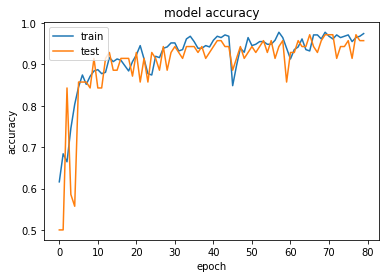

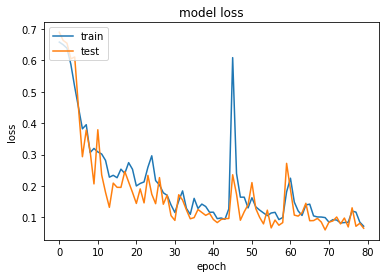

In [22]:
# list all data in history
print(history.history.keys())
# summarizing the history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarizing the history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Prediction**

In [23]:
predict_dir_path='../input/hypochromic-cells/hypo/test/'
onlyfiles = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(onlyfiles)

['c0194 1.24.40 PM 1.30.46 PM.jpg', 'cropped_blood_cells_original_8.png_63bc8b24-35a4-4926-be4a-10d572eef3a3 1.28.24 PM 1.30.27 PM.png', 'c0130 1.30.27 PM.jpg', 'c0080 1.30.27 PM.jpg', 'cropped_blood_cells_original_2.png_22796396-abda-4067-84ae-a05e43ad215f 1.30.27 PM.png', 'cropped_blood_cells_original_9.png_bde64ec6-c72b-4a59-b116-c806c371770c 1.24.40 PM 1.30.46 PM.png', 'K30400511 1.30.46 PM.jpg', 'K30400466 1.30.46 PM.jpg']


In [24]:
from tensorflow.keras.preprocessing import image
normal_counter = 0 
hypochromic_counter  = 0
#other_counter = 0
for file in onlyfiles:
    img = image.load_img(predict_dir_path +file , target_size=(img_width, img_height))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size=10)
    classes = classes[0]
    
    if classes == 0:
        print(file + ": " + 'hypochromic')
        hypochromic_counter += 1
    elif classes == 1:
        print(file + ": " + 'normal')
        normal_counter += 1
    #else:
     #   print(file + ": " + 'other')
      #  other_counter += 1
print("Total normal :",normal_counter)
print("Total Hypochromic :",hypochromic_counter)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


c0194 1.24.40 PM 1.30.46 PM.jpg: normal
cropped_blood_cells_original_8.png_63bc8b24-35a4-4926-be4a-10d572eef3a3 1.28.24 PM 1.30.27 PM.png: normal
c0130 1.30.27 PM.jpg: normal
c0080 1.30.27 PM.jpg: normal
cropped_blood_cells_original_2.png_22796396-abda-4067-84ae-a05e43ad215f 1.30.27 PM.png: normal
cropped_blood_cells_original_9.png_bde64ec6-c72b-4a59-b116-c806c371770c 1.24.40 PM 1.30.46 PM.png: hypochromic
K30400511 1.30.46 PM.jpg: hypochromic
K30400466 1.30.46 PM.jpg: normal
Total normal : 6
Total Hypochromic : 2
